In [ ]:
from google.colab import files
uploaded=files.upload()

Saving laptopData.csv to laptopData.csv


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('laptopData.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.shape

(1303, 12)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


**Data Cleaning and Manipulation**

In [ ]:
df=df.drop({'Unnamed: 0'},axis=1)

In [ ]:
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298     True
1299     True
1300     True
1301     True
1302     True
Length: 1273, dtype: bool

In [ ]:
df=df.drop_duplicates()

Now since we removes the null and duplicated rows, next step is to check every column for abnormal values.

In [ ]:
df.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [ ]:
df.TypeName.unique()

array(['Ultrabook', 'Notebook', nan, 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [ ]:
df.Inches.unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In the Inches column we have a '?' value, next step is to remove the entire row

In [ ]:
for x in df.index:
  if df.loc[x,'Inches']=='?':
    df.drop(x,inplace=True)

In [ ]:
df.Inches.unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '31.6', '17', '15', '14.1', '11.3', '10.1'], dtype=object)

In [ ]:
df.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160', '4K Ultra HD 3840x2160',
       'Touchscreen 1366x768', 'Touchscreen 2560x1440',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ 3200x1800',
       'IPS Panel Qua

Now we will extract the screen resolution from the ScreenResolution column.

In [ ]:
df['ScreenResolution']=df['ScreenResolution'].apply(lambda x: x.split(" ")[-1])

In [ ]:
df.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,Asus,Ultrabook,14,1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,Acer,Ultrabook,14,1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


Next step is to extract the cpu speed from the cpu column.

In [ ]:
df['CPU Speed']=df['Cpu'].apply(lambda x:x.split(' ')[-1])

In [ ]:
df=df.drop('Cpu',axis=1)

In [ ]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,CPU Speed
0,Apple,Ultrabook,13.3,2560x1600,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2.3GHz
1,Apple,Ultrabook,13.3,1440x900,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1.8GHz
2,HP,Notebook,15.6,1920x1080,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,2.5GHz


In [ ]:
df.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [ ]:
df.Weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '?', '2.9kg', '4.42kg', '2.69kg', '2.37kg',
       '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg',
       '2.18kg', '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg',
       '

There is an abnormal value, we have to remove it.

In [ ]:
for x in df.index:
  if df.loc[x,'Weight']=='?':
    df.drop(x,inplace=True)

In [ ]:
df.Weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '2.9kg', '4.42kg', '2.69kg', '2.37kg', '4.7kg',
       '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg', '2.18kg',
       '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg', '2.25kg',
   

**Data visualization and Analysis**

1.Which company sells the most expensive and cheapest laptop.

In [ ]:
df.sort_values(by='Price',ascending=False)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,CPU Speed
196,Razer,Gaming,17.3,3840x2160,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,324954.720,2.9GHz
830,Razer,Gaming,17.3,3840x2160,32GB,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,292986.720,2.9GHz
610,Lenovo,Notebook,15.6,3840x2160,32GB,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.5kg,261018.720,3.1GHz
749,HP,Workstation,17.3,1920x1080,16GB,256GB SSD,Nvidia Quadro M2000M,Windows 7,3kg,233845.920,2.9GHz
1066,Asus,Gaming,17.3,1920x1080,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg,211788.000,2.7GHz
...,...,...,...,...,...,...,...,...,...,...,...
791,Vero,Notebook,14,1920x1080,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.22kg,10810.512,1.1GHz
290,Acer,Notebook,15.6,1366x768,2GB,16GB SSD,Intel HD Graphics,Chrome OS,2.19kg,10602.720,1.5GHz
31,Asus,Notebook,14,1366x768,2GB,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65kg,10602.720,1.5GHz
1120,Vero,Notebook,13.3,1920x1080,4GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.35kg,10442.880,1.44GHz


Ans.Razer sells the most expensive laptop and Acer sells the cheapest laptop.

2.Show the variation in Laptop type.

In [ ]:
df2=pd.DataFrame([df.TypeName.unique(),df.TypeName.value_counts()]).transpose()
df2.head(10)

,0,1
0,Ultrabook,710
1,Notebook,203
2,Gaming,191
3,2 in 1 Convertible,116
4,Workstation,29
5,Netbook,24


In [ ]:
df2.rename(columns={0:'Type',1:'Counts'},inplace=True)

In [ ]:
print(df2)

                 Type Counts
0           Ultrabook    710
1            Notebook    203
2              Gaming    191
3  2 in 1 Convertible    116
4         Workstation     29
5             Netbook     24


In [ ]:
fig1=px.pie(df2,values='Counts',names='Type',title='Variation in laptop type')
fig1.show()

From the above pie chart, it can be concluded that companies make more Ultrabooks.

2.Effect of weight on price.

In [ ]:
df['Weight']=df['Weight'].apply(lambda x:x.replace('kg','')).astype(np.float64)

In [ ]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [ ]:
fig2=px.scatter(df,x='Weight',y='Price',title='Effect of Weight on Price')
fig2.show()

Ans.Lighter laptops are cheaper.

3.How does the type of laptop affect its price?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

82.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

42.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categor

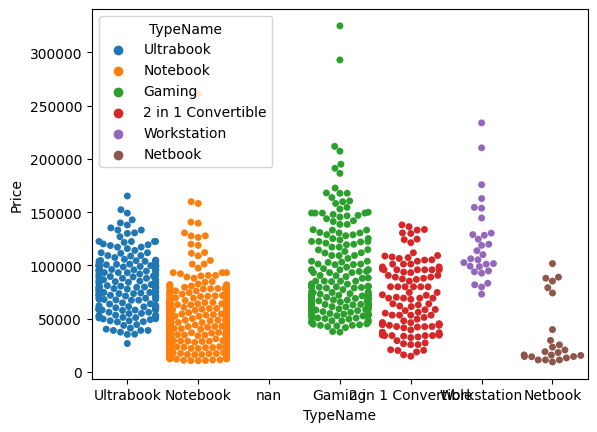

In [ ]:
fig3=sns.swarmplot(data=df,x='TypeName',y='Price',hue='TypeName')
plt.show()

4.Which company offers the most lightweight laptops on average?

In [ ]:
df6=pd.DataFrame([df.Company,df.Weight]).transpose()
df6

,Company,Weight
0,Apple,1.37
1,Apple,1.34
2,HP,1.86
3,Apple,1.83
4,Apple,1.37
...,...,...
1269,Asus,2.2
1270,Lenovo,1.8
1271,Lenovo,1.3
1272,Lenovo,1.5


In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 1273
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  1243 non-null   object 
 1   Weight   1243 non-null   float64
dtypes: float64(1), object(1)
memory usage: 61.4+ KB


In [ ]:
df6['Weight']=df6['Weight'].astype(np.float64)
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 1273
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  1243 non-null   object 
 1   Weight   1243 non-null   float64
dtypes: float64(1), object(1)
memory usage: 61.4+ KB


In [ ]:
df7=df6.groupby('Company').mean('Weight')
df7.head()
df7.sort_values(by='Weight',ascending=True)

,Weight
Company,
LG,1.050000
Huawei,1.050000
Google,1.100000
Microsoft,1.251333
Samsung,1.315556
Apple,1.320476
Vero,1.330000
Mediacom,1.337143
Xiaomi,1.620000


Ans. Lg and Huawei has the lighest laptops on an average.